**INTRODUCTION**

The data set comprises of information on 7200 apps on App store with following imp details:

"id" : App ID
"track_name": App Name
"size_bytes": Size (in Bytes)
"price": Price amount
"rating_count_tot": User Rating counts (for all version)
"rating_count_ver": User Rating counts (for current version)
"prime_genre": Primary Genre

Link To Notebook: https://colab.research.google.com/drive/1J_khk45vb1WKEZPFCzaMlNgzCq3bWu02?usp=sharing



In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
apple_df = pd.read_csv('AppleStore.csv')
apple_df.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


**Data Wrangling & Checking for Nulls**

In [3]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


In [4]:
apple_df.shape

(7197, 17)

In [5]:
apple_df.dtypes

Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

In [6]:
apple_df.isnull().sum()

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [7]:
#getting rid of unnecessary colums
apple_df_drop = apple_df.drop(['vpp_lic', 'ipadSc_urls.num', 'lang.num'], axis=1)
apple_df_drop.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37


**EXPLORATORY ANALYSIS**

**1. How do you visualize the price distribution of apps?**

In [11]:
print ('1. Free apps are ' + str(sum(apple_df.price == 0)))
print ('2. Counting (outliers) super expensive apps ' + str(sum(apple_df.price > 50)))
print (' -  which is around ' + str(sum(apple_df.price > 50)/len(apple_df.price)*100) +
       " % of the total Apps")
print (' Thus we will dropping the following apps')
outlier=apple_df[apple_df.price>50][['track_name','price','prime_genre','user_rating']]
freeapps = apple_df[apple_df.price==0]
outlier

1. Free apps are 4056
2. Counting (outliers) super expensive apps 7
 -  which is around 0.09726274836737529 % of the total Apps
 Thus we will dropping the following apps


,track_name,price,prime_genre,user_rating
115,Proloquo2Go - Symbol-based AAC,249.99,Education,4.0
162,NAVIGON Europe,74.99,Navigation,3.5
1136,Articulation Station Pro,59.99,Education,4.5
1479,LAMP Words For Life,299.99,Education,4.0
2181,Articulation Test Center Pro,59.99,Education,4.5
2568,KNFB Reader,99.99,Productivity,4.5
3238,FineScanner Pro - PDF Document Scanner App + OCR,59.99,Business,4.0


In [13]:
# removing
paidapps =apple_df[((apple_df.price<50) & (apple_df.price>0))]
print('Now the max price of any app in new data is : ' + str(max(paidapps.price)))
print('Now the min price of any app in new data is : ' + str(min(paidapps.price)))
#paidapps.prime_genre.value_counts()

Now the max price of any app in new data is : 49.99
Now the min price of any app in new data is : 0.99


**2. How is price affected by category?**

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


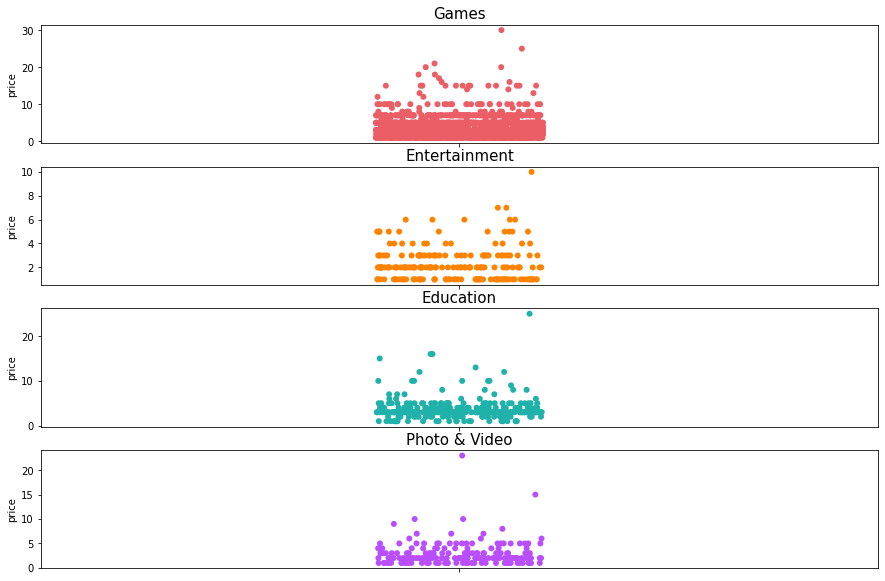

In [14]:
yrange = [0,25]
fsize =15

plt.figure(figsize=(15,10))

plt.subplot(4,1,1)
plt.xlim(yrange)
games = paidapps[paidapps.prime_genre=='Games']
sns.stripplot(data=games,y='price',jitter= True , orient ='h',size=6,color='#eb5e66')
plt.title('Games',fontsize=fsize)
plt.xlabel('') 

plt.subplot(4,1,2)
plt.xlim(yrange)
ent = paidapps[paidapps.prime_genre=='Entertainment']
sns.stripplot(data=ent,y='price',jitter= True ,orient ='h',size=6,color='#ff8300')
plt.title('Entertainment',fontsize=fsize)
plt.xlabel('') 

plt.subplot(4,1,3)
plt.xlim(yrange)
edu = paidapps[paidapps.prime_genre=='Education']
sns.stripplot(data=edu,y='price',jitter= True ,orient ='h' ,size=6,color='#20B2AA')
plt.title('Education',fontsize=fsize)
plt.xlabel('') 

plt.subplot(4,1,4)
plt.xlim(yrange)
pv = paidapps[paidapps.prime_genre=='Photo & Video']
sns.stripplot(data=pv,y='price',jitter= True  ,orient ='h',size=6,color='#b84efd')
plt.title('Photo & Video',fontsize=fsize)
plt.xlabel('') 

plt.show()

**3. How does distribution of free vs. paid apps vary by category?**

In [22]:
print("There are total of " + str(len(apple_df.prime_genre.value_counts().index)) 
      + " categories")


There are total of 23 categories


# reducing the number of categories to better interpret data

In [24]:
s = apple_df.prime_genre.value_counts().index[:4]
def categ(x):
    if x in s:
        return x
    else : 
        return "Others"

apple_df['broad_genre']= apple_df.prime_genre.apply(lambda x : categ(x))

In [25]:
free = apple_df[apple_df.price==0].broad_genre.value_counts().sort_index().to_frame()
paid = apple_df[apple_df.price>0].broad_genre.value_counts().sort_index().to_frame()
total = apple_df.broad_genre.value_counts().sort_index().to_frame()
free.columns=['free']
paid.columns=['paid']
total.columns=['total']
dist = free.join(paid).join(total)
dist ['paid_per'] = dist.paid*100/dist.total
dist ['free_per'] = dist.free*100/dist.total
dist

,free,paid,total,paid_per,free_per
Education,132,321,453,70.860927,29.139073
Entertainment,334,201,535,37.570093,62.429907
Games,2257,1605,3862,41.558778,58.441222
Others,1166,832,1998,41.641642,58.358358
Photo & Video,167,182,349,52.148997,47.851003


In [26]:
list_free= dist.free_per.tolist()
tuple_free = tuple(list_free)
tuple_paidapps = tuple(dist.paid_per.tolist())

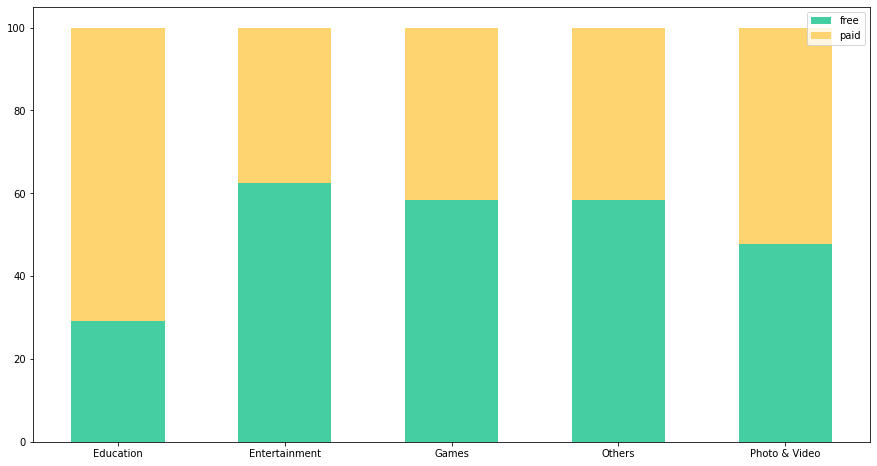

In [27]:
plt.figure(figsize=(15,8))
N=5
ind = np.arange(N)    # the x locations for the groups
width =0.56   # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, tuple_free, width, color='#45cea2')
p2 = plt.bar(ind, tuple_paidapps, width,bottom=tuple_free,color='#fdd470')
plt.xticks(ind,tuple(dist.index.tolist() ))
plt.legend((p1[0], p2[0]), ('free', 'paid'))
plt.show()
# for pie chart
pies = dist[['free_per','paid_per']]
pies.columns=['free %','paid %']
plt.show()

4. As app size increase, does price increase as well?

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


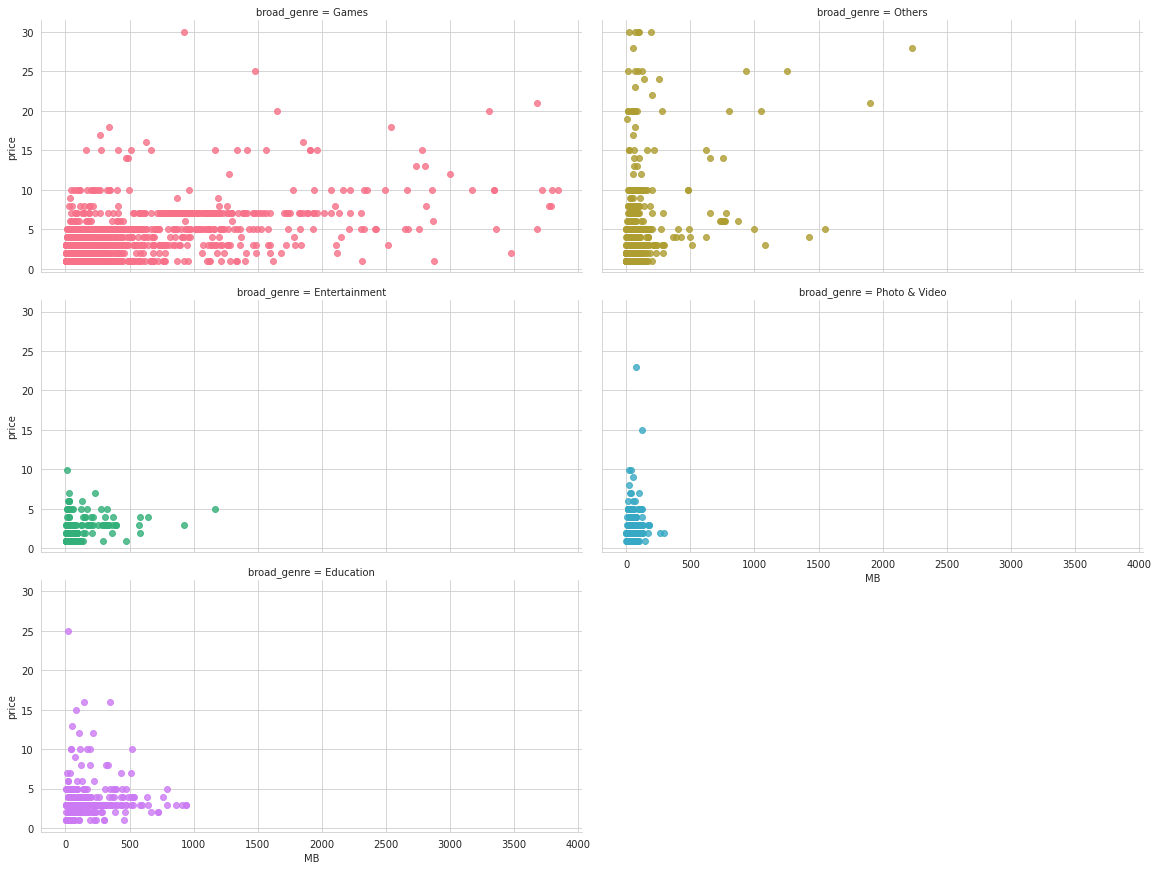

In [29]:
sns.color_palette("husl", 8)
sns.set_style("whitegrid")
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
apple_df ['MB']= apple_df.size_bytes.apply(lambda x : x/1048576)
paidapps_regression =apple_df[((apple_df.price<30) & (apple_df.price>0))]
sns.lmplot(data=paidapps_regression,
           x='MB',y='price',size=4, aspect=2,col_wrap=2,hue='broad_genre',
           col='broad_genre',fit_reg=False,palette = sns.color_palette("husl", 5))
plt.show()